In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading transcation and purchase files

tran=pd.read_excel("QVI_transaction_data.xlsx",sheet_name="in")
pur=pd.read_csv("QVI_purchase_behaviour.csv")

In [11]:
tran.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [9]:
pur.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [14]:
# Description

tran.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [15]:
pur.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [16]:
# Checking for missing values in transaction file

tran.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [17]:
# Checking for missing values in purchase file
pur.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [20]:
# Changin DATE column format to datetime format in transaction file

tran1=pd.to_datetime(tran.DATE ,errors="ignore",unit='D',origin=pd.to_datetime('1899-12-30'))
tran1.head()


0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]

In [24]:
# Creating copy of tran as tran2 wih correct date format
tran2=tran.copy()
tran2.DATE= tran1

<AxesSubplot:xlabel='PROD_QTY', ylabel='TOT_SALES'>

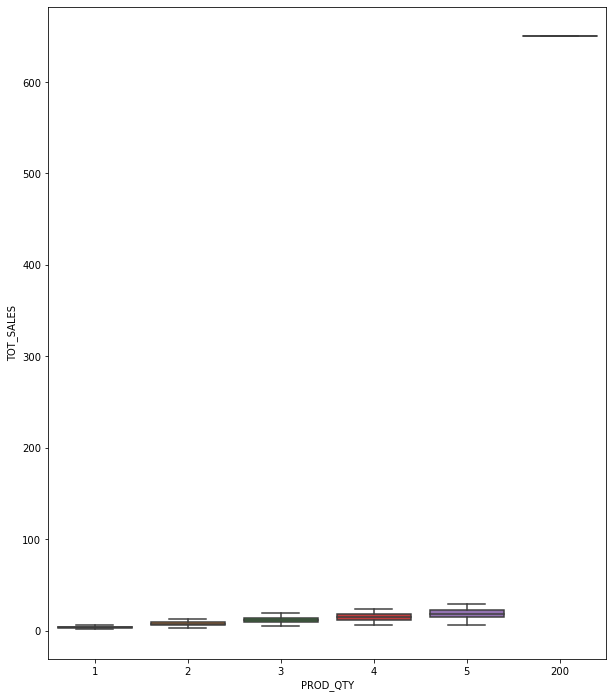

In [25]:
# Checking outliners in PROD_QTY and TOT_SALES
plt.figure(figsize=(10,12))
sns.boxplot(tran2.PROD_QTY,tran.TOT_SALES)

In [26]:
#Other options to check outliners
p=tran2.PROD_QTY.sort_values()
p.tail(10)
s=tran2.TOT_SALES.sort_values()
s.tail(10)

32248      28.5
55558      29.5
184969     29.5
117850     29.5
171815     29.5
69496      29.5
5179       29.5
150683     29.5
69763     650.0
69762     650.0
Name: TOT_SALES, dtype: float64

In [27]:
# PROD_QTY= 200  and TOT_SALES=650 are outliners
# Checking where quantity as 200 
tran2[tran2.PROD_QTY==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [28]:
# Checking card number for 200 product quantities
pur[pur.LYLTY_CARD_NBR==226000]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
59694,226000,OLDER FAMILIES,Premium


In [29]:
# Removing Outliner where quantity were 200 and sales were 650
tran2=tran2.drop([69762,69763])

In [30]:
# Adding new column for packet weight in grams

def pack(row):
    l=[]
    for i in row:
        if i.isnumeric():
            l.append(i)
        else:
            continue
    return int("".join(l))

c=tran2.PROD_NAME.map(lambda x: pack(x) )
tran2["Pack_gram"]=c

In [32]:
# Renaming Brand name and doing needful corrections 

b=tran2.PROD_NAME.map(lambda x:x.split()[0] )
# Correcting names as same name has been writeen in two ways
b[b=="RRD"]="Red"
b[b=="Infzns"]="Infuzions"
b[b=="Snbts"]="Sunbites"
b[b=="Doritos"]="Dorito"
b[b=="WW"]="Woolworths"
b[b=="NCC"]="Natural"
b[b=="GrnWves"]="Grain"
b[b=="Smiths"]="Smith"

tran2.PROD_NAME=b


In [33]:
tran2.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_gram
0,2018-10-17,1,1000,1,5,Natural,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs,3,6.3,175
2,2019-05-20,1,1343,383,61,Smith,2,2.9,170
3,2018-08-17,2,2373,974,69,Smith,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle,3,13.8,150


In [36]:
# Merging transcation and purchase behaviour data
tran3=pd.merge(tran2,pur,on="LYLTY_CARD_NBR", how="inner")

# Reordering columns
tran3=tran3[['DATE', 'STORE_NBR','TXN_ID', 'PROD_NBR',
       'PROD_NAME','Pack_gram', 'PROD_QTY', 'TOT_SALES' ,'LYLTY_CARD_NBR','LIFESTAGE',
       'PREMIUM_CUSTOMER']]

tran3.to_csv("tran_behav.csv")

In [37]:
tran3.head()

,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,Pack_gram,PROD_QTY,TOT_SALES,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1,5,Natural,175,2,6.0,1000,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,348,66,CCs,175,3,6.3,1307,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,346,96,Woolworths,160,2,3.8,1307,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,347,54,CCs,175,1,2.1,1307,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,383,61,Smith,170,2,2.9,1343,MIDAGE SINGLES/COUPLES,Budget


f:\python\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:>

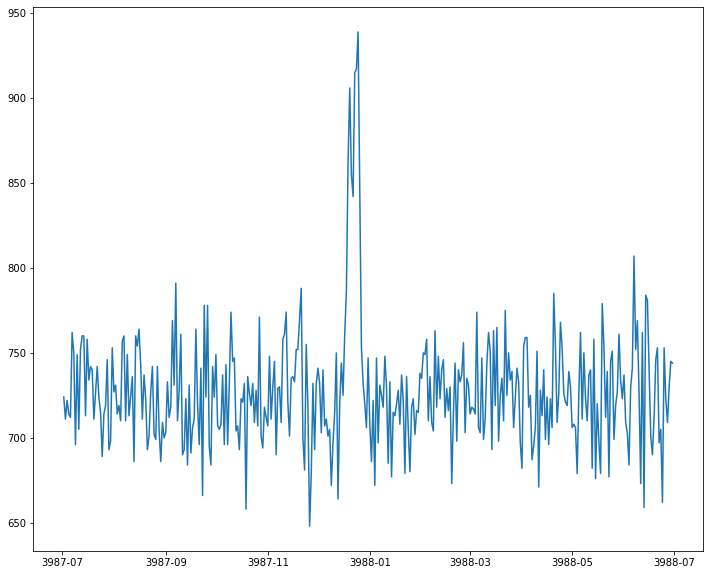

In [38]:
# TOTAL_SALES DRIVERS

# Checking on which date has most number of sales and highest total sales
plt.figure(figsize=(12,10))
tran3.DATE.map(lambda x:x.date()).value_counts().plot()

In [40]:
tran3.groupby("DATE").TOT_SALES.sum().sort_values(ascending=False)
# Showing day before christmas has highest number of purchase

DATE
2018-12-24    6923.00
2018-12-23    6826.00
2018-12-19    6639.80
2018-12-22    6558.70
2018-12-20    6300.80
               ...   
2018-08-19    4309.75
2018-08-20    4198.20
2019-05-17    4192.45
2019-05-15    4060.30
2019-05-18    4036.50
Name: TOT_SALES, Length: 364, dtype: float64

<AxesSubplot:xlabel='Packet size in gms', ylabel='TOT_SALES'>

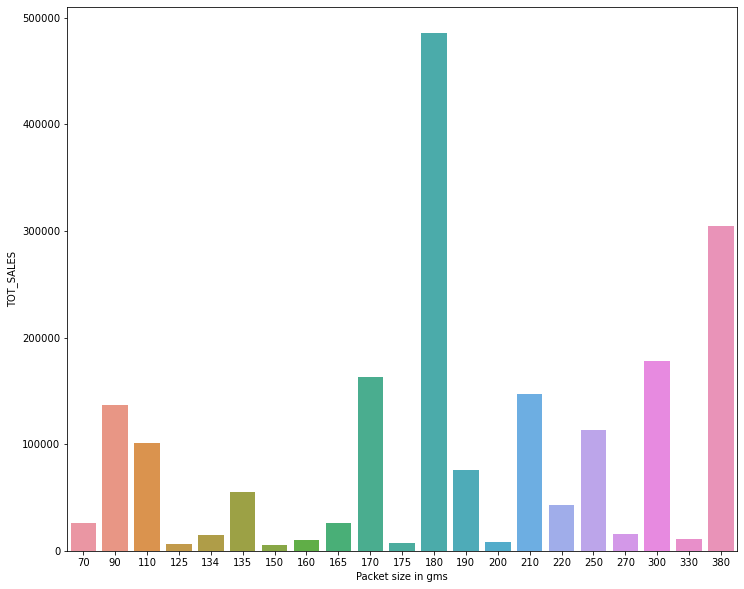

In [41]:
# Checking which packet size yields highest total sales
plt.figure(figsize=(12,10))
plt.xlabel("Packet size in gms")
sns.barplot(y=tran3.groupby("Pack_gram").TOT_SALES.sum(), x=tran3.Pack_gram.unique())  

<AxesSubplot:xlabel='Brand name', ylabel='PROD_NAME'>

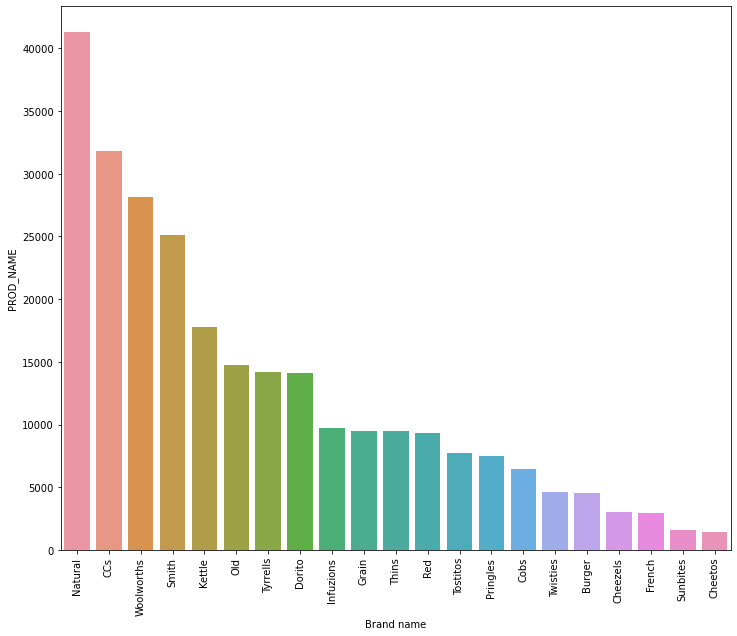

In [42]:
# Most frequently purchased brand name
plt.figure(figsize=(12,10))
plt.xlabel("Brand name")
plt.xticks(rotation=90) 
sns.barplot(y=tran3.PROD_NAME.value_counts(),x=tran3.PROD_NAME.unique())

<AxesSubplot:xlabel='Brand name', ylabel='TOT_SALES'>

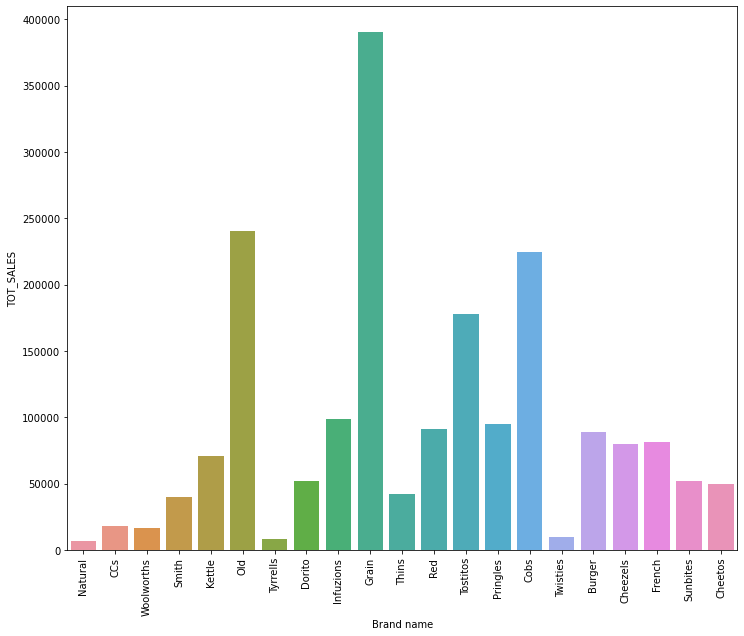

In [43]:
# Brand producing highest total sales
plt.figure(figsize=(12,10))
plt.xlabel("Brand name")
plt.xticks(rotation=90) 
sns.barplot(y=tran3.groupby("PROD_NAME").TOT_SALES.sum(), x=tran3.PROD_NAME.unique())

<AxesSubplot:xlabel='LIFESTAGE', ylabel='count'>

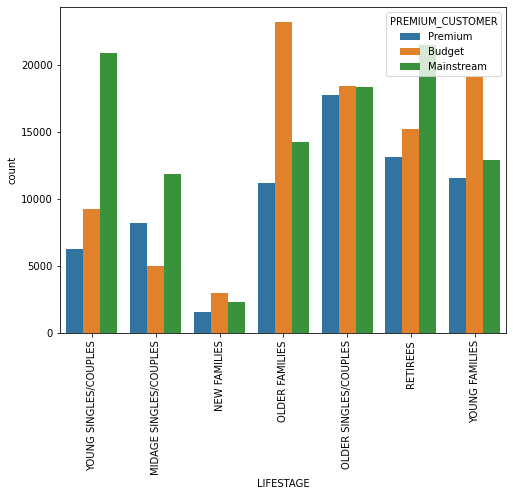

In [44]:
# Customers(LIFESTAGE and PREMIUM_CUSTOMER) responsible for most frequent sales
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
sns.countplot(x=tran3.LIFESTAGE, hue=tran3.PREMIUM_CUSTOMER)

<AxesSubplot:ylabel='TOT_SALES'>

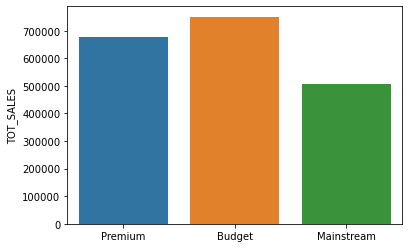

In [45]:
# Checking which Customer premium_category yields highest total sales
o=tran3.groupby("PREMIUM_CUSTOMER").TOT_SALES.sum() 
sns.barplot(x=tran3.PREMIUM_CUSTOMER.unique(), y=o)

(-1.2094075637674175,
 1.189803458403263,
 -1.2535856710543005,
 1.178586391932169)

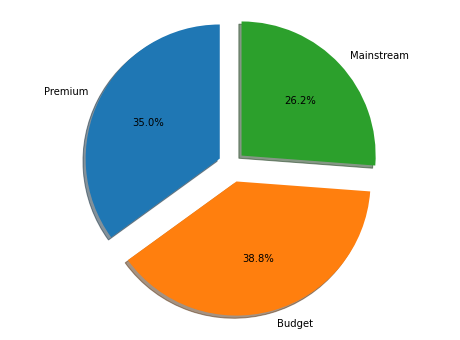

In [46]:
# Showing pie chart as well
labels = tran3.PREMIUM_CUSTOMER.unique()
sizes = o
explode=[0.1,0.13,0.1]
plt.figure(figsize=(8,6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

(-1.2259396192242187,
 1.2230112326562892,
 -1.2073153723416181,
 1.205185454698794)

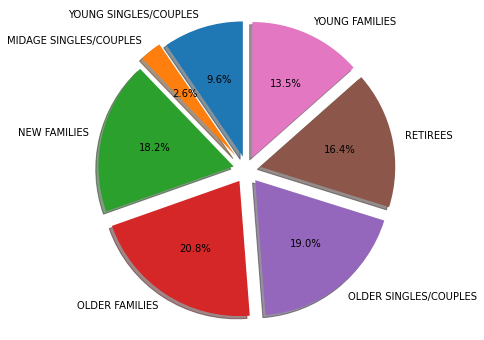

In [47]:
# Which LIFESTAGE catogory contribute in high total sales
labels = tran3.LIFESTAGE.unique()
sizes = tran3.groupby("LIFESTAGE").TOT_SALES.sum()
explode=[0.1,0.13,0.1,0.1,0.1,0.1,0.1]
plt.figure(figsize=(8,6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
